# A Basic Model of Electricity and Heat Systems

Consider a stylized model of the electricity and heat systems where a portfolio of generators (indexed $i$) competes to serve a time varying demand for electricity $(D_h^E)$ and heat $(D_h^H)$, where $h$ refers to hours. The consumers' willingness to pay are 100 €/MWh for both electricity and heat throughout all hours. The system relies on four different type of generators:

- <u>Standard (dispatchable) plants</u> use a combination of primary energy carriers (indexed by $j$) and an aggregate of other inputs $(oth)$ to produce either electricity or heat. Let $\mu_j^i$ denote the input share of energy carrier $j$ for generator $i$, measured as MWh input of energy carrier $j$ per MWh output of electricity or heat. Let $E_{i,h}$ and $H_{i,h}$ denote the hourly generation of electricity and heat, and let $q_i$ denote the installed hourly generating capacity for the plant $i$.
- <u>Intermittent plants</u> are similar to standard plants, except that hourly generating capacity is defined as $q_{i,h} = q_i \gamma_{i,h}$ where $\gamma_{i,h}\in[0,1]$ indicates availability of generator $i$ in hour $h$. We use the notation $\mathcal{I}^E$ ($\mathcal{I}^H$) to denote the set of all standard and intermittent electricity (heat) producing plants.    
- <u>Back-pressure plants</u> are similar to standard electricity producing plants, except that they utilize the excess heat from electricity production to co-produce heat. Let $\nu_i$ denote the electricity-to-heat ratio for a back-pressure plant $i$. We use the notation $\mathcal{I}^{BP}$ to denote the set of all back-pressure plants. 
- <u>Heat pumps</u> are slightly different than standard heat producing plants as they rely on electricity as energy input. Thus, heat pumps have negative electricity-to-heat ratios $(\nu_i<0)$. We use the notation $\mathcal{I}^{HP}$ to denote the set of all heat pumps.

The optimization problem is given by the system in (1):

\begin{align}
    \max_{E_{i,h}, H_{i,h}, D_h^E, D_h^H} \mbox{ }&W = \sum_h\left( u_E\cdot D_h^E-\sum_{i \in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}\rbrace}c_i\cdot E_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace}\text{FOM}_i\cdot q_i^E \tag{1a} \label{eq:mBasicHeat_Objective}\\ 
    &\mbox{ }\mbox{ }\mbox{ }\mbox{ }+{\sum_h\left( u_H\cdot D_h^H-\sum_{i \in \lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}c_i\cdot H_{i,h}\right)-\sum_{i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace}\text{FOM}_i\cdot q_i^H} \notag \\
    &E_{i,h}= \nu_i H_{i,h}, \qquad \forall i\in\lbrace \mathcal{I}^{BP}, \mathcal{I}^{HP} \rbrace\label{eq:mBasicHeat_CHP} \tag{1b} \\
    &D_h^E = \sum_{i\in \lbrace \mathcal{I}^E, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace }E_{i,h} \label{eq:mBasicHeat_equi_E} \tag{1c}\\ 
    &D_h^H = \sum_{i\in \lbrace \mathcal{I}^H, \mathcal{I}^{BP}, \mathcal{I}^{HP}\rbrace} H_{i,h} \label{eq:mBasicHeat_equi_H} \tag{1d}\\ 
    &D_h^E\in[0, L_h^E] \label{eq:mBasicHeat_LoadConstraintE} \tag{1e}\\ 
    &D_h^H\in[0,L_h^H] \label{eq:mBasicHeat_LoadConstraintH} \tag{1f}\\ 
    &E_{i,h} \in[0,q_{i,h}^E], \qquad \forall i\in\lbrace \mathcal{I}^E,\mathcal{I}^{BP}\rbrace. \label{eq:mBasicHeat_ECap} \tag{1g}\\
    &H_{i,h} \in[0,q_{i,h}^H], \qquad \forall i\in\lbrace \mathcal{I}^H, \mathcal{I}^{HP}\rbrace \label{eq:mBasicHeat_HCap} \tag{1h}
\end{align}

# Part 1: Analytical exercises

## E1.1

__Describe the optimization problem above.__

## E1.2

__Set up the Lagrangian for the optimization problem in [E1.1](#E1.1) and show that the first order conditions for $E_{i,h}$ and $H_{i,h}$ can be writen as:__

\begin{align}
\forall i\in\mathcal{I}^E & : & - c_i+\lambda_h^E + \underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{2a} \label{eq:1a} \\
\forall i\in\mathcal{I}^{BP} & : & - c_i+\lambda_h^E + \frac{\lambda^H}{\nu_i} +\underline{\theta}_{i,h}^E-\overline{\theta}_{i,h}^E &= 0& \tag{2b} \label{eq:1b} \\
\forall i\in\mathcal{I}^{H} & : & - c_i+\lambda_h^H + \underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{2c} \label{eq:1c} \\
\forall i\in\mathcal{I}^{HP} & : & - c_i+\lambda_h^H + \nu_i\lambda^E +\underline{\theta}_{i,h}^H-\overline{\theta}_{i,h}^H &= 0& \tag{2d} \label{eq:1d}
\end{align}

where $\lambda^E$ and $\lambda^H$ denote the shadow costs of equilibrium constraints on electricity and heat markets in hour $h$, respectively, and $\underline{\theta}$ and $\overline{\theta}$ denote the shadow costs on the domain constraints on generation variables $E$ and $H$. 

*Note: Use the same notation as in the above*.

## E1.3

__Briefly explain the intuition the first-order conditions in [E1.2](#E1.2).__ 

## E1.4

__Show the reservation price of electricity (denoted $r_{i,h}^E$) for back-pressure producing plants is given by__

\begin{align}
    \forall i\in\mathcal{I}^{BP}: \quad r_{i,h}^E = c_i-\frac{\lambda_h^H}{\nu_i}
\end{align}

__and provide intuition__.


_Hint:_
_By reservation price we mean the inverted supply function. To gain intuition let us consider standard plants $(i\in\mathcal{I}^E)$, which face the profit maximizing problem:_

\begin{align}
    \max_{E_{i,h}\in[0,q_{i,h}]} \quad E_{i,h}\left(\lambda_h^E - c_i\right)
\end{align}
*The optimal generation decision (i.e. the supply function) is then*

\begin{align}
    E^*_{i,h}(\lambda_h^E)\begin{cases}
    =q_{i,h} & \lambda_h^E>c_i \\
    \in[0,q_{i,h}] & \lambda_h^E=c_i \\
    =0 & \lambda_h^E<c_i
    \end{cases}
\end{align}

*We cannot directly invert $E^*_{i,h}(\lambda_h^E)$ (i.e. isolate for $\lambda_h^E$), but it is quite clear, that plant $i\in\mathcal{I}^E$ only generates electricity if $\lambda_h^E\geq c_i$. Hence the reservation price of standard electricity producing plants are $r_{i,h}^E=c_i$.*

*Another way to see this is simply to isolate for $\lambda_h^E$ in the first-order condition in (2a) and drop the shadow prices on the domain constraints. You can use this last logic to derive the reservation price of electricity for heat producing plants.*

## E1.5

__Derive heat pumps' hourly marginal willings to pay $(\text{MWP}^{HP}_h)$ for electricity using the condition in eq. (2d) and provide intuition for the expression.__

## E1.6

__Explain how the heat pump technology can be seen as an example of (i) electrification and (ii) flexible demand.__

# Part 2: Numerical exercises

In the rest of this exercise, we will be working with the a simplified version of the `mBasicPH` model adapted to the model setting above. The file `HP_InputData.xlsx` includes a model database with parameters for the model. We refer to the scenario with parameters as outlined in this data as the _baseline_ scenario. The table below translates the names used in the data to the symbols used in the model. 

| Name in excel file | Model symbol |
|:--------|:--------:|
| id | $i$ | 
| BFt | $j$ |
| h | $h$ |
|  FuelMix   |  $\mu_{i,j}$   |
|  GeneratingCapacity   | $q_i$   |
|  OtherMC   | $c_i^{oth}$   |
| E2H | $\nu_i$ |
| FuelPrice | $p_j^f$ |
| EmissionIntensity | $\phi_j$ |
| MWP, E | $\mu_E$ |
| MWP, H | $\mu_E$ |
| LoadVariation, E | $L_h^E$ |
| LoadVariation, H | $L_h^H$ |
| CapVariation | $\gamma_{i,h} $ |

For working with the model, we first import some packages and the modelclass:

In [1]:
%run ../stdPackages.ipynb
from pyDbs import *
from py.modelclass import *
from IPython.display import Image
figs_path = os.path.join(d['curr'],'Figs')

Next we load the database:

In [2]:
kwargs = {'variables': ['Fundamentals', 'LoadVariables', 'GeneratorsVariables'],
        'maps': ['LoadMaps','GeneratorsMaps'],
        'variable2D': ['HourlyVariation'],
        'scalars': ['Scalars']}
path_to_data = os.path.join(d['curr'],'Data','E41_Data.xlsx')
db = read.dbFromWB(path_to_data, kwargs)
readSets(db)

We then initialize and solve the model:

In [3]:
m = mSimple(db.copy()) # initialize using the database 'db' from above.
m()

Solution status 0: Optimization terminated successfully. (HiGHS Status 7: Optimal)


Finally, we will store some variables for the different technology types:

In [4]:
# Get a mapping from id to modelTech:
id2modelTech = m.db['id2tech'].to_frame(index=False).merge(m.db['tech2modelTech'].to_frame(index=False)).set_index(['id','tech','modelTech'])
# Back-pressure plants:
BP_id = db['id'][db['id'].isin(id2modelTech.xs('BP',level='modelTech').index.get_level_values('id'))]
# Standard electricity plants:
StdE_id = db['id'][db['id'].isin(id2modelTech.xs('standard_E',level='modelTech').index.get_level_values('id'))]
# All electricity plants:
E_id = BP_id.append(StdE_id)
# Standard heat plants:
StdH_id = db['id'][db['id'].isin(id2modelTech.xs('standard_H',level='modelTech').index.get_level_values('id'))]
# Heat pumps
HP_id = db['id'][db['id'].isin(id2modelTech.xs('HP',level='modelTech').index.get_level_values('id'))]
# All heat plants
H_id = StdH_id.append(HP_id)

In the following, we will show how to  illustrate the hourly demand curve for heat. We will draw the curve $h=\{1,5\}$. You task in the following, will be to draw the supply curve for heat, as well as the supply and demand curve for electricity in the same hours.

We start by making a grid of $h=\{1,5\}$:

In [5]:
h_grid = [1,5]

We will also define a minimum price for drawing the curve:

In [6]:
loλ = 0

To make the illustration, we will first make a dateframe with quantity demand and the associated willingness to pay:

In [7]:
# First we create a multiindex for the dataframe
mi_Hd = pd.MultiIndex.from_product([['c1'],m.db['h']],names=['c_type','h'])

# Now we build a dataframe with the demanded quantity and the marginal willingess to pay.
df_Hd = pd.concat([
  pd.Series(m.hourlyLoad_H.tolist(),index=mi_Hd,name='H'), # Hourly demand
  pd.Series(list(np.repeat(m.db['MWP_H'],len(m.db['h']))),index=mi_Hd,name='mwp'), # MWP_H
],axis=1)

Because the demand is kinked at the willingess to pay, we need a data-point above and below to draw the curve.

The point above the kink is:

In [8]:
ϵ = np.finfo(float).eps*10**6 # small number
# Upper point (crossing with y-axes):
mi_Hd_up = pd.MultiIndex.from_product([['0'],db['h'].tolist()], names=['c_type','h'])
df_Hd_up = pd.concat([
    pd.Series(-ϵ,index=mi_Hd_up,name='H'),
    pd.Series(m.db['MWP_H']+ϵ,index=mi_Hd_up,name='mwp')
],axis=1)

The point 

In [9]:
# Lower point (crossing with x-axis):
mi_Hd_lo = pd.MultiIndex.from_product([['-1'],db['h'].tolist()],names=['c_type','h'])
df_Hd_lo = pd.concat([
    pd.Series(ϵ,index=mi_Hd_lo,name='H'),
    pd.Series(loλ,index=mi_Hd_lo,name='mwp')
],axis=1)

Finally, we collect it all in a common dataframe and aggregate demand:

In [10]:
df_Hd = pd.concat([df_Hd,df_Hd_up,df_Hd_lo],axis=0).sort_values(['h','mwp'],ascending=[True,False])
df_Hd['H_cs'] =df_Hd.groupby('h')['H'].transform('cumsum')

Now we make the graph:

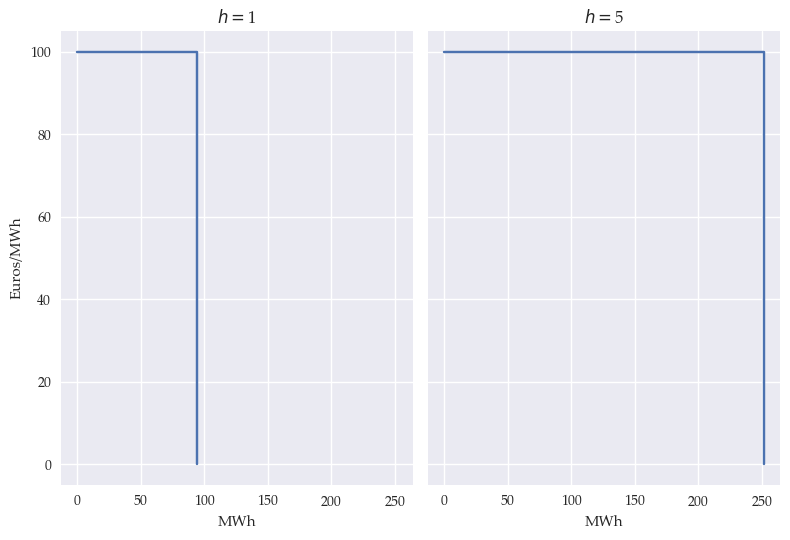

In [11]:
fig, ax = plt.subplots(ncols=2,sharex=True,sharey=True)
for i in range(len(h_grid)):
    h = h_grid[i]
    ax[i].step(df_Hd.xs(h,level='h')['H_cs'],df_Hd.xs(h,level='h')['mwp'])
    ax[i].set_title(r'$h=$'+str(h))
    
[ax[i].set_xlabel('MWh') for i in [0,1]];
ax[0].set_ylabel('Euros/MWh')
fig.tight_layout()

## E2.1

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for heat for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^H_h}^*$ Finally, discuss how the reservation price of heat can be negative in $h=1$.__

*Note: To compute the supply curve, you have to realize the the reservation price for back-pressure plants and heat pumps is not equal to their marginal costs $(mc_i)$ because their reservation price depend on the electricity market. Therefore, you may draw the supply curve given the optimal value ${\lambda_{h}^{E}}^{*}$.*

*Furthermore, the graph should look something like this:*

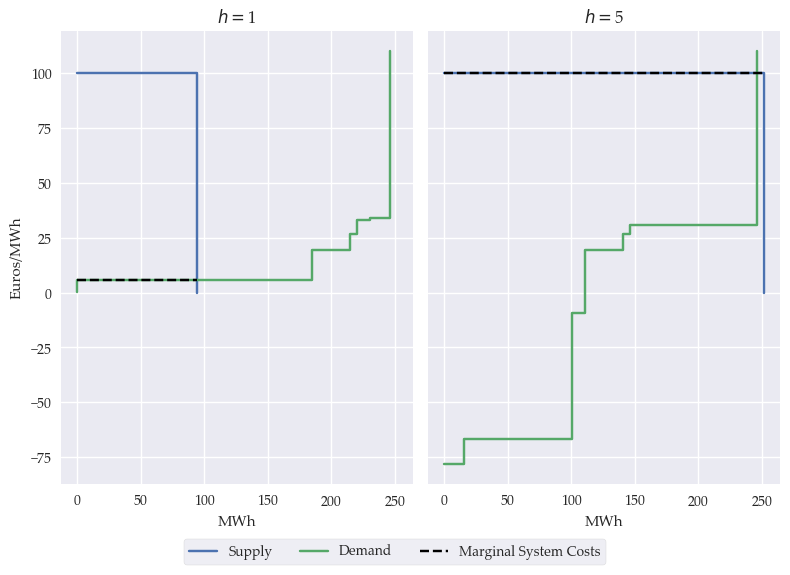

In [12]:
Image(os.path.join(figs_path,'E2.1_sol.png'))

## E2.2

__Illustrate the demand curve for electricity for $h=\{1,5\}$ and comment on why the maximum willingness to pay in $h=5$ is so high.__ 

_Note: For this, you have to illustrate the aggregate demand curve is composed of the sum of the set of conventional consumes $(c_E)$ as well that the sum of heat pumps' maximum capacity for electricity consumption: $-\sum_{i\in\mathcal{I}^E}\nu_iq_{i,h}$. Hence, you will have compute $\text{MWP}^{HP}_h$ using your answer in [E1.4](#E1.4) as well as heat pumps' maximum input capacity of electricity._

_Furthermore, the figure should look something like this:__

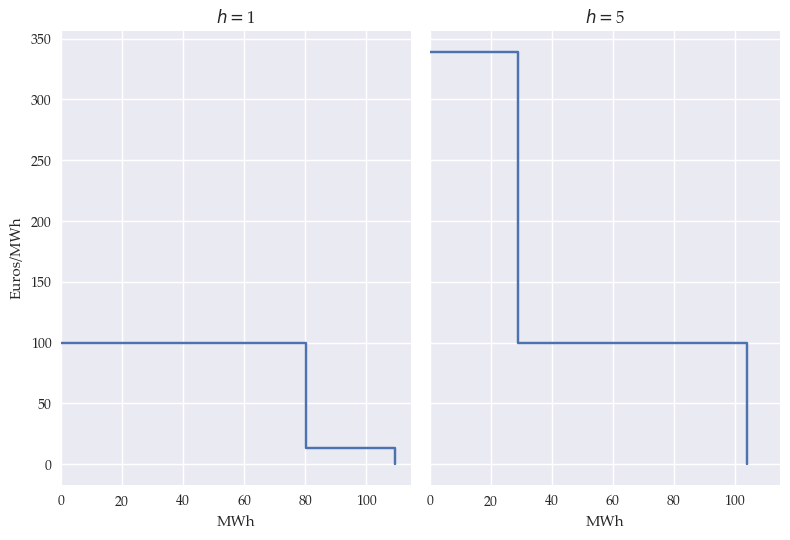

In [22]:
Image(os.path.join(figs_path,'E2.2_sol.png'))

## E2.3

__Compute and illustrate the hourly supply curve (i.e. the merit order curve) for electricity for hours $h=\{1,5\}$. Include also the demand curve and the optimal value ${\lambda^E_h}^*$.__

*Hint: The figure should look something like this:*

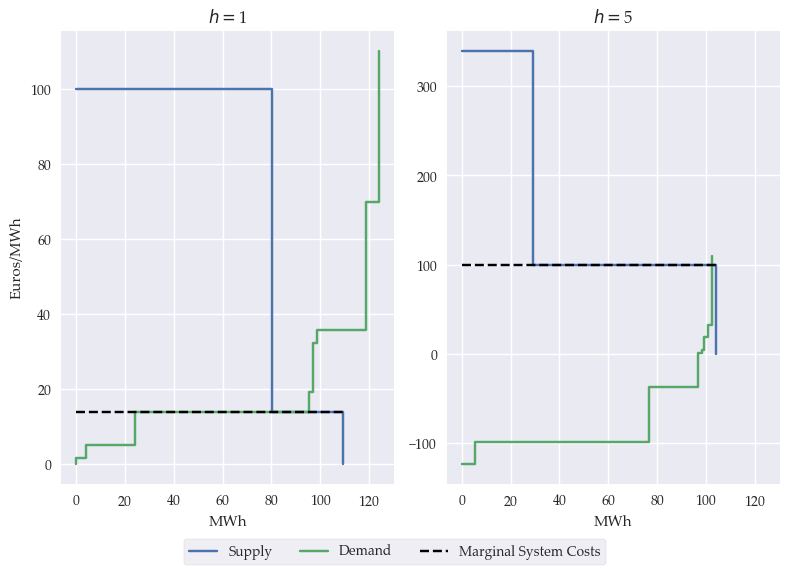

In [28]:
Image(os.path.join(figs_path,'E2.3_sol.png'))

## E2.4

In this exercise you are asked to simulate the effects of increasing the heat pump capacity. We will do so by solving the model over of an exogenous grid of the heat pump capacity. For making the grid, the `pyDbs` package has a class called `adjMultiIndex`, which has a function called _addGrid_. It takes the four centrale arguments:

```python
adjMultiIndex.addGrid(v0,vT,index,name)
```
where 
- v0 is a Pandas Index specifying the first element of the grid. 
- vT is a Pandas Index specifying the last element of the grid.
- index is a Pandas Index specifying the number points in the gridd.
- name is the name of the variable, we are changing. 

The following makes the grid:

In [34]:
loop = pd.Index(range(11), name = 'l1')
v0 = pd.Series(0.01, index = pd.Index(['g1_HP'], name = 'id'), name = 'GeneratingCap_H')
vT = v0+100
grid = adjMultiIndex.addGrid(v0,vT,index=loop,name='GeneratingCap_H')

__Now use the 'loopSolveExtract'-function in the `modelShell`-class to solve the model of the exogenous grid. Furthermore, extract the following list of variables:__
```python
extract = [
    'meanConsumerPrice_E','meanConsumerPrice_H', # average yearly consumer prices
    'marginalEconomicValue' # marginal economic value of capacity
]
```

## E2.5

Consider the following figure illustrating the _marginal economic value of generating capacity_ as a function of installed heat pump capacity split into electricity generators $(i\in\mathcal{I}^{E})$, heat generators $(i\in\mathcal{I}^{H})$, and back-pressure plants $(i\in\mathcal{I}^{BP})$:

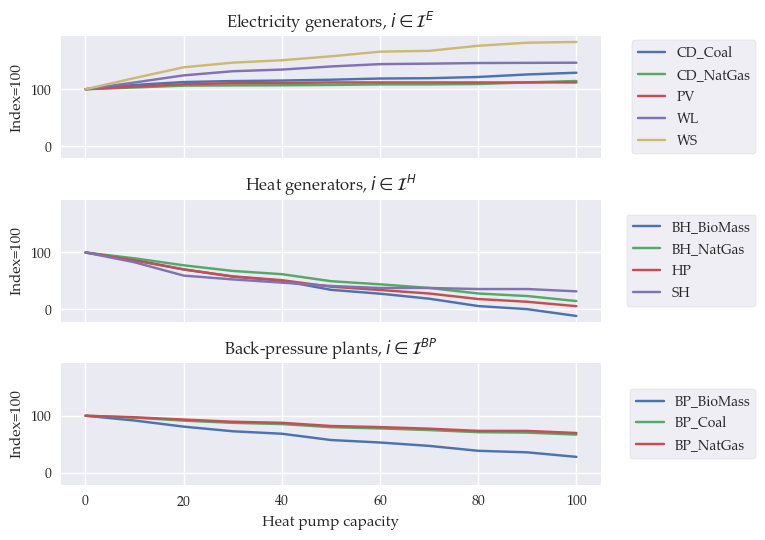

In [36]:
Image(os.path.join(figs_path,'E2.5_sol.png'))

__Define the marginal economic value of capacity and explain the effect of the heat pump capacity on the marginal economic value of generating capacity for (i) electricity producing plants, (ii) heat generating plants, and (iii) back-pressure plants.__